<a href="https://colab.research.google.com/github/Deadalus1901/Healthcare-Prediction/blob/master/Healthcare_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



sns.set_style('white')
sns.set_palette('Set2')

In [ ]:
# train data
train = pd.read_csv('/content/diabetes_binary_5050.csv')
# test data
test = pd.read_csv('/content/diabetes_binary_health.csv')

In [ ]:
train.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
test.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

print(train.columns == test.columns)


train shape: (70692, 22)
test shape: (253680, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [ ]:
train.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
test.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
train.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
test.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
for col in train.columns:
    print(f"{col}: {np.sort(train[col].unique())}")
    

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 89. 92. 95. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Education: [1

In [ ]:
train['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

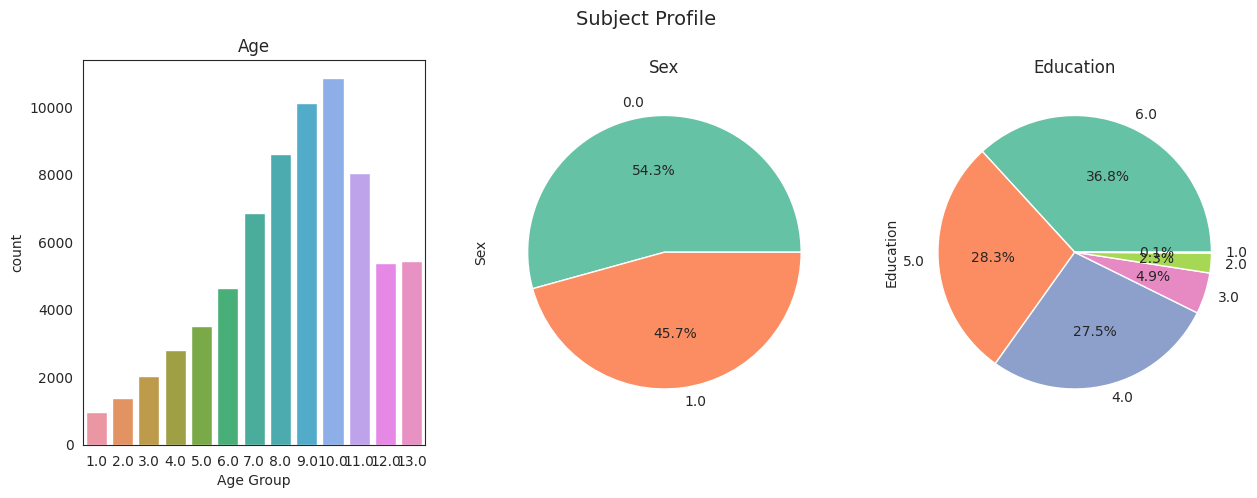

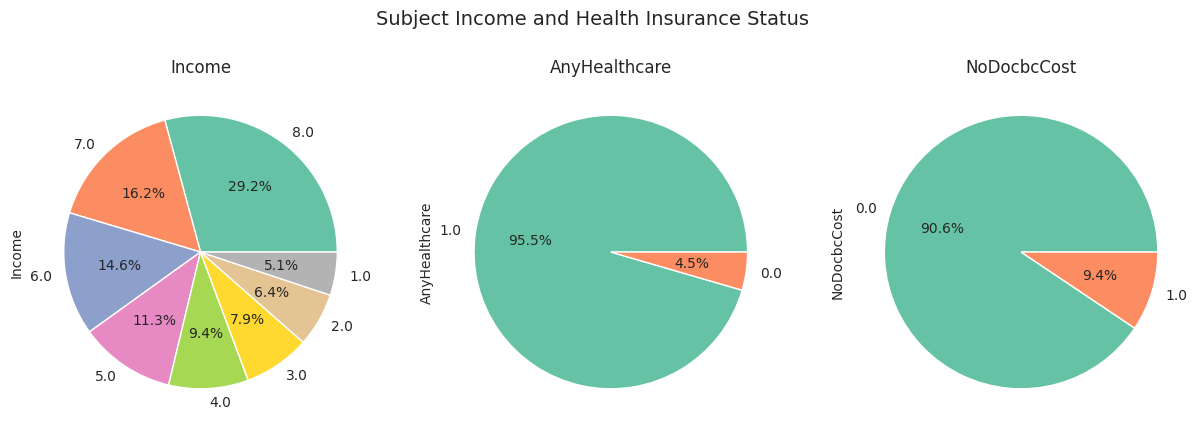

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

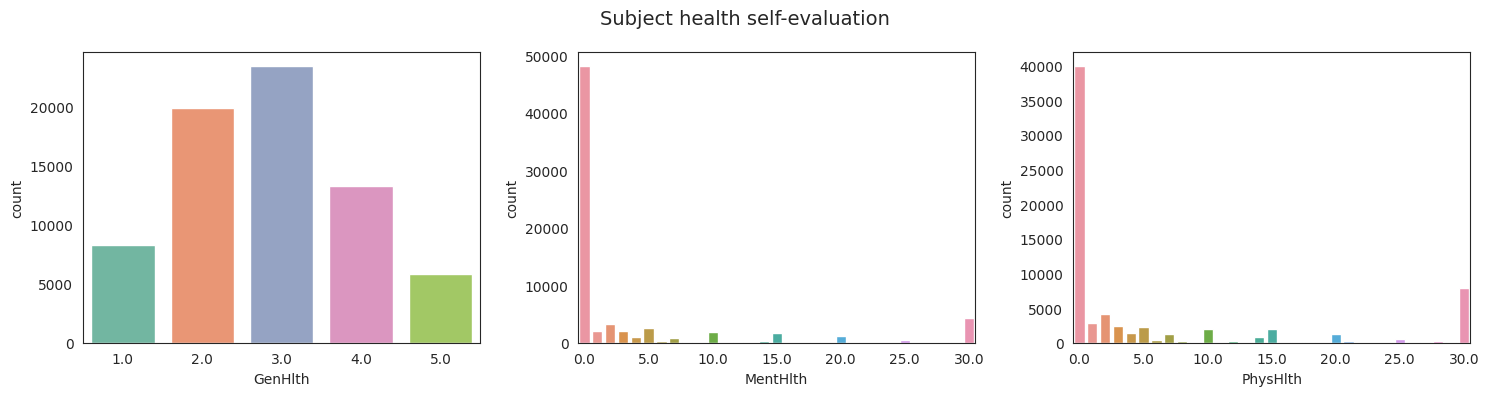

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

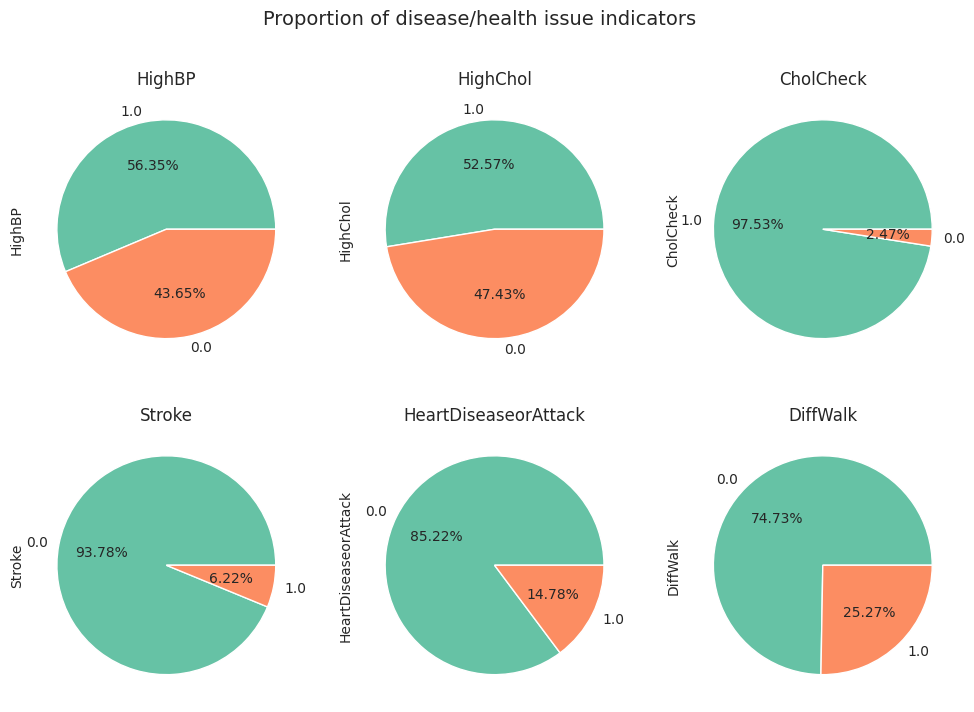

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()


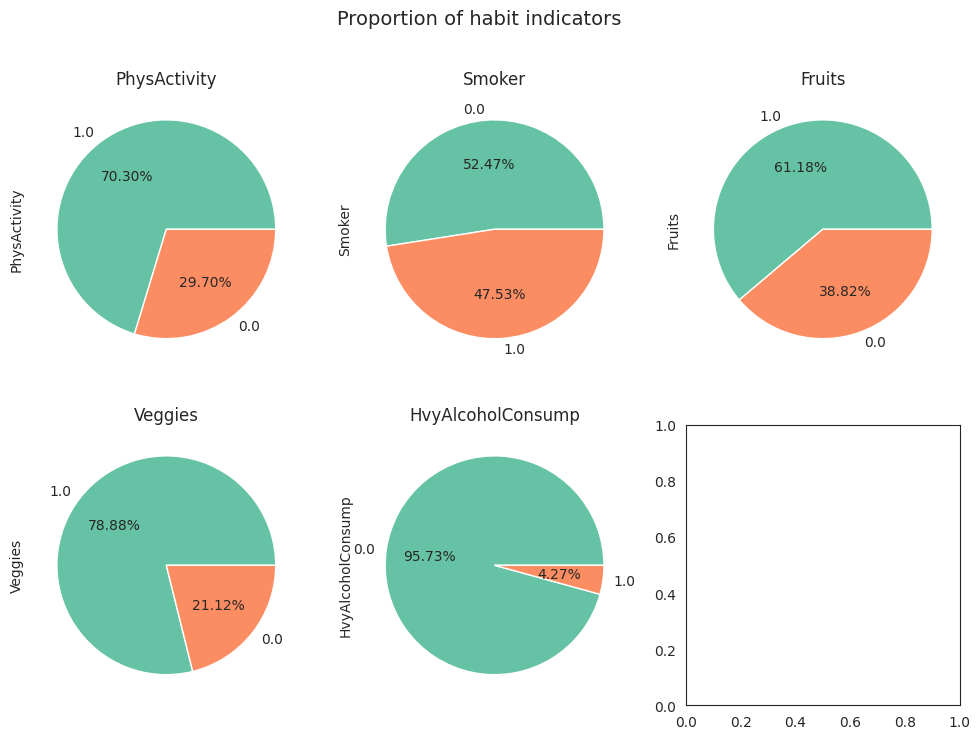

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()


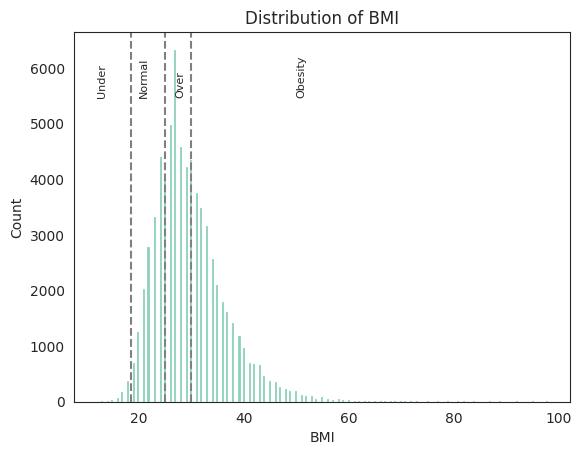

In [ ]:
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(train['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

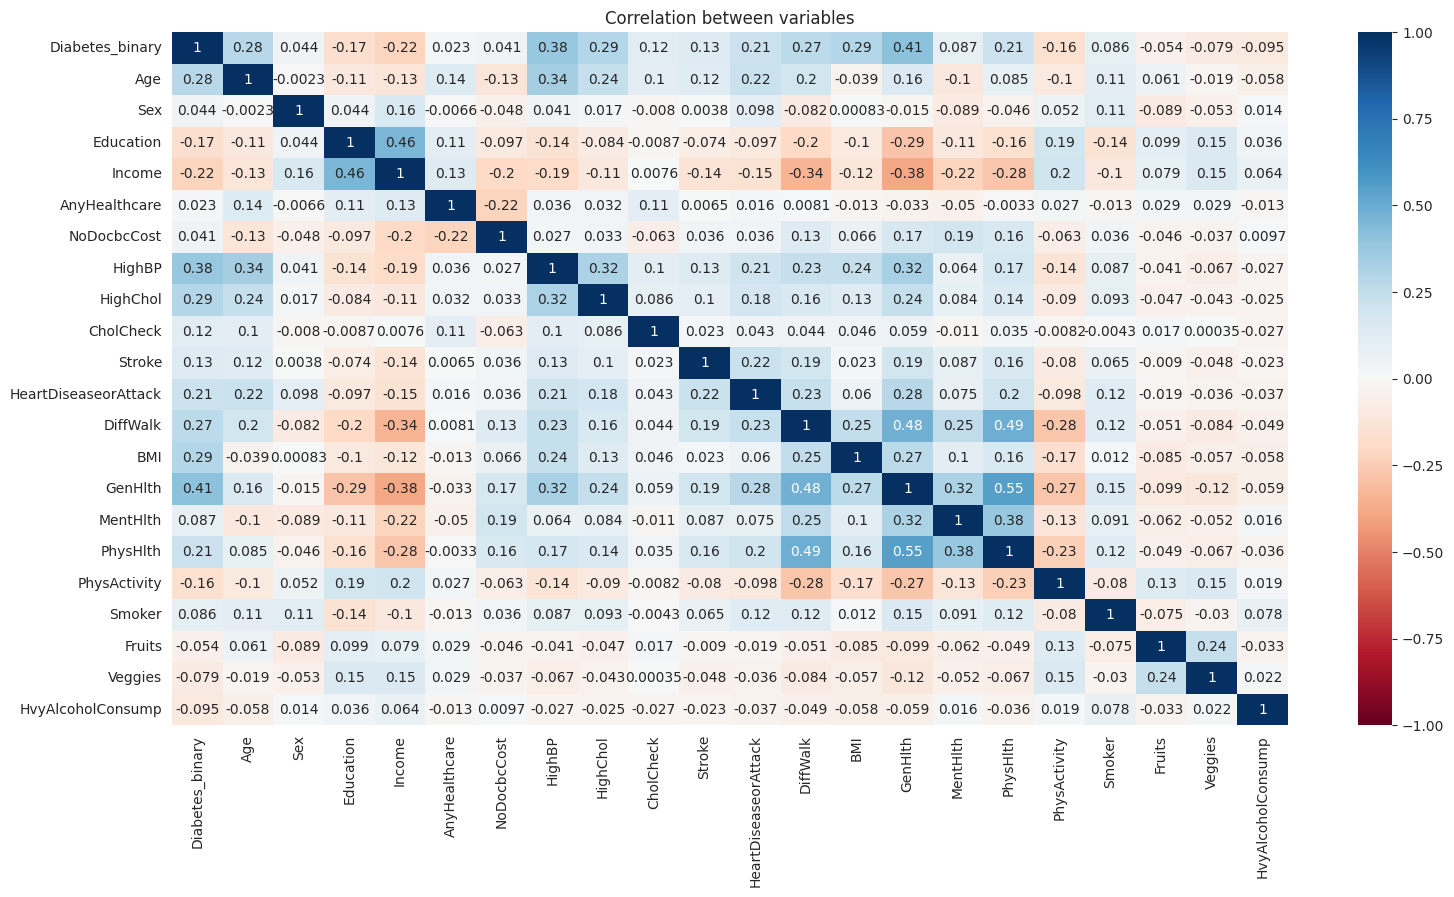

In [ ]:
cols = ['Diabetes_binary'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()


In [ ]:
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [ ]:
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
6,0.755026,0.734868,0.798495,0.765361,0.754995,0.753589,0.733281,0.794865,0.762832,0.753709,Gradient Boosting
0,0.748077,0.738670,0.768350,0.753218,0.748062,0.748497,0.737264,0.769896,0.753227,0.748559,Logistic Regression
4,0.765494,0.740645,0.817649,0.777244,0.765456,0.748143,0.721939,0.804795,0.761119,0.748307,SVM
2,0.995102,0.996386,0.993816,0.995099,0.995103,0.735837,0.715811,0.779685,0.746384,0.735964,Random Forest
5,0.719644,0.725235,0.707884,0.716455,0.719652,0.718014,0.719845,0.711165,0.715478,0.717994,Naive Bayes
3,0.797181,0.782740,0.823126,0.802425,0.797163,0.709880,0.697706,0.737693,0.717142,0.709961,KNN
1,0.995137,0.999537,0.990741,0.995119,0.995140,0.649834,0.649048,0.648035,0.648541,0.649829,Decision Tree


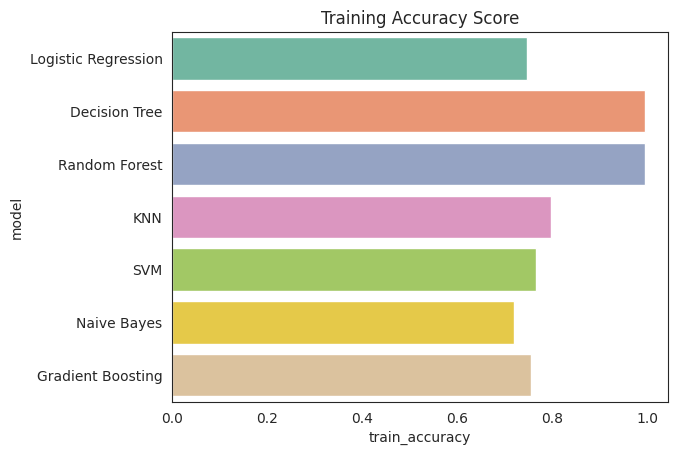

In [ ]:
sns.barplot(x='train_accuracy', y='model', data=results)
plt.title('Training Accuracy Score')
plt.show()

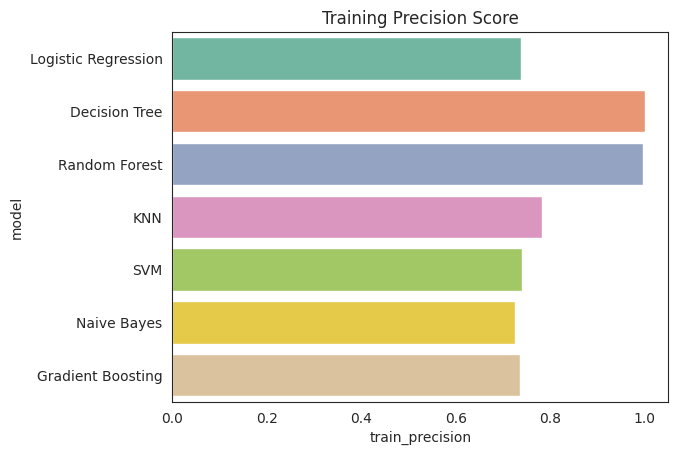

In [ ]:
sns.barplot(x='train_precision', y='model', data=results)
plt.title('Training Precision Score')
plt.show()

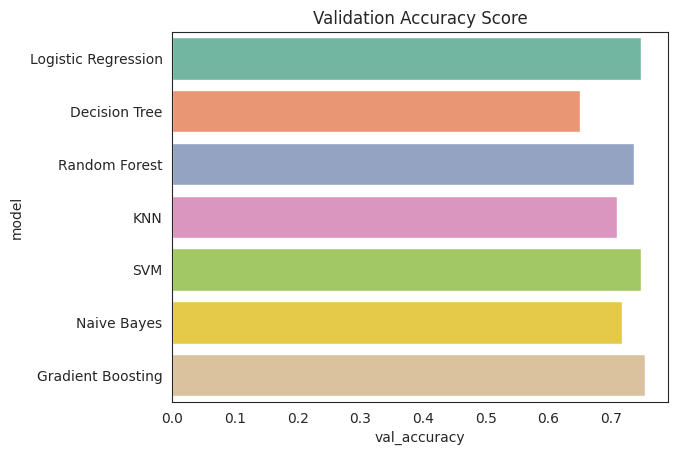

In [ ]:
sns.barplot(x='val_accuracy', y='model', data=results)
plt.title('Validation Accuracy Score')
plt.show()

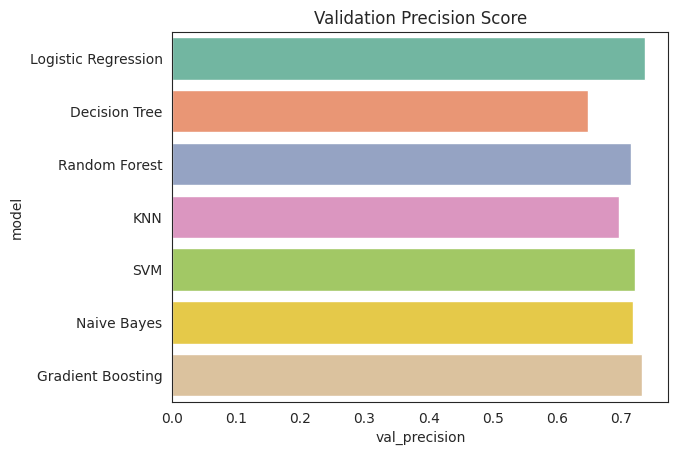

In [ ]:
sns.barplot(x='val_precision', y='model', data=results)
plt.title('Validation Precision Score')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

gb = GradientBoostingClassifier()

random_search = RandomizedSearchCV(gb, param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

{'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [ ]:
param_grid = {
    'max_depth': [4, 5, 6],
    'max_features': ['sqrt'],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
}

# create the model
gb = GradientBoostingClassifier()

# create the grid search
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# fit the model
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}


In [ ]:
best_model = GradientBoostingClassifier(**grid_search.best_params_)
evaluate_model(best_model, X_train, y_train, X_val, y_val)


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc
0,0.763903,0.74193,0.809838,0.774398,0.76387,0.757267,0.735329,0.801674,0.767069,0.757396


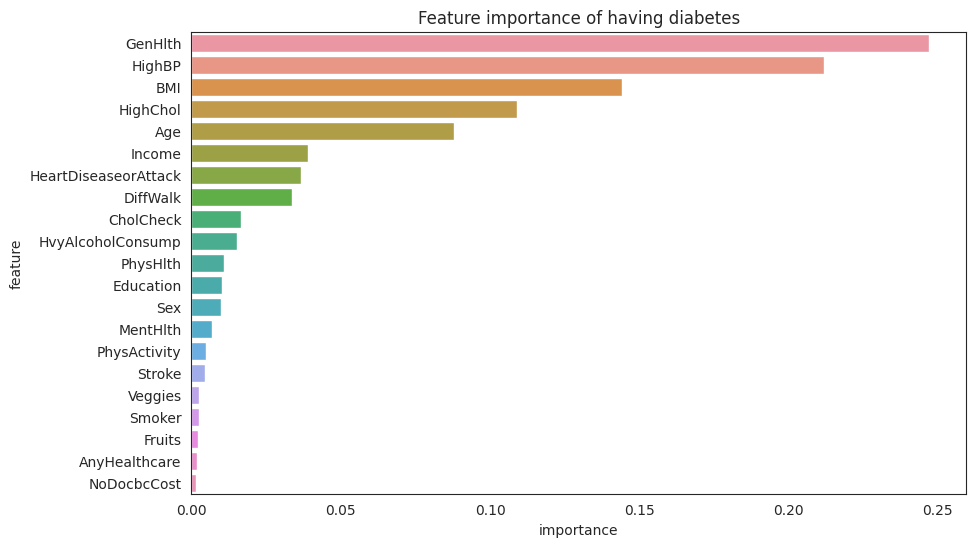

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()


In [ ]:
feature_importance.head(8)['importance'].sum()

0.909967052134844

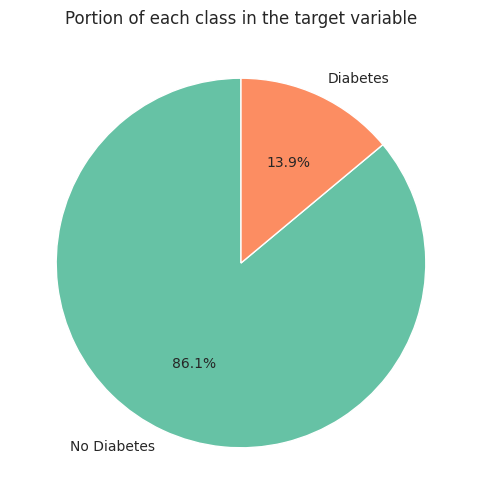

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Portion of each class in the target variable')
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.81    218334
         1.0       0.31      0.81      0.45     35346

    accuracy                           0.72    253680
   macro avg       0.63      0.76      0.63    253680
weighted avg       0.87      0.72      0.76    253680

ROC AUC score: 0.757311687216935


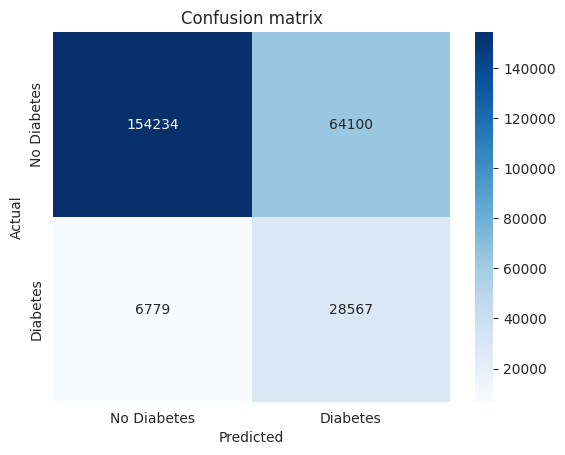

In [ ]:
y_test_pred = best_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

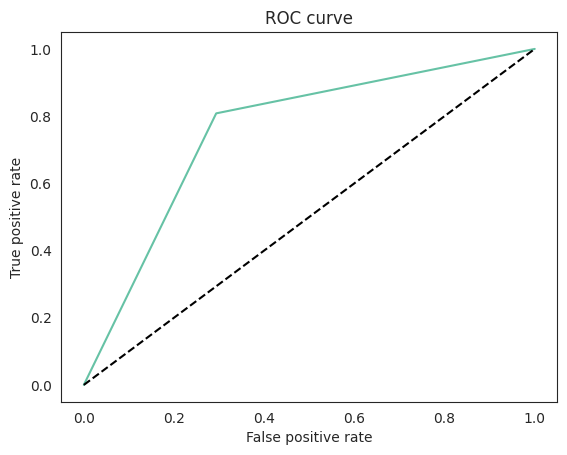

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()